<a href="https://colab.research.google.com/github/ananyamandala/aiml-batch-16/blob/main/rice_plant_leaf_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import cv2
import numpy as np

def load_images_from_folder(folder):
    images = []
    labels = []
    for filename in os.listdir(folder):
        label = folder.split('/')[-1]
        img_path = os.path.join(folder, filename)
        if os.path.isfile(img_path):
            image = cv2.imread(img_path)
            if image is not None:
                images.append(image)
                labels.append(label)
    return images, labels


folder_paths = ["/content/drive/MyDrive/rice_leaf_diseases/Bacterial_leaf_blight", "/content/drive/MyDrive/rice_leaf_diseases/Brown_spot", "/content/drive/MyDrive/rice_leaf_diseases/Leaf_smut"]

all_images = []
all_labels = []


for folder_path in folder_paths:
    images, labels = load_images_from_folder(folder_path)
    all_images.extend(images)
    all_labels.extend(labels)


RESIZE_WIDTH = 100
RESIZE_HEIGHT = 100
resized_images = []
for img in all_images:
    resized_img = cv2.resize(img, (RESIZE_WIDTH, RESIZE_HEIGHT))
    resized_images.append(resized_img)


images_np_resized = np.array(resized_images)
labels_np = np.array(all_labels)



KNN Accuracy: 0.4583333333333333
KNN Classification Report:
                       precision    recall  f1-score   support

Bacterial_leaf_blight       0.50      0.38      0.43         8
           Brown_spot       0.46      0.60      0.52        10
            Leaf_smut       0.40      0.33      0.36         6

             accuracy                           0.46        24
            macro avg       0.45      0.44      0.44        24
         weighted avg       0.46      0.46      0.45        24

SVM Accuracy: 0.625
SVM Classification Report:
                       precision    recall  f1-score   support

Bacterial_leaf_blight       0.83      0.62      0.71         8
           Brown_spot       0.54      0.70      0.61        10
            Leaf_smut       0.60      0.50      0.55         6

             accuracy                           0.62        24
            macro avg       0.66      0.61      0.62        24
         weighted avg       0.65      0.62      0.63        24



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.6666666666666666
Logistic Regression Classification Report:
                       precision    recall  f1-score   support

Bacterial_leaf_blight       1.00      0.62      0.77         8
           Brown_spot       0.62      0.80      0.70        10
            Leaf_smut       0.50      0.50      0.50         6

             accuracy                           0.67        24
            macro avg       0.71      0.64      0.65        24
         weighted avg       0.71      0.67      0.67        24

Epoch 1/10
3/3 [==============================] - 1s 180ms/step - loss: 9947.7266 - accuracy: 0.2917 - val_loss: 7340.3359 - val_accuracy: 0.4167
Epoch 2/10
3/3 [==============================] - 0s 75ms/step - loss: 4848.2310 - accuracy: 0.4271 - val_loss: 6611.7974 - val_accuracy: 0.3333
Epoch 3/10
3/3 [==============================] - 0s 81ms/step - loss: 5346.8911 - accuracy: 0.3333 - val_loss: 1777.2284 - val_accuracy: 0.3333
Epoch 4/10
3/3 [============

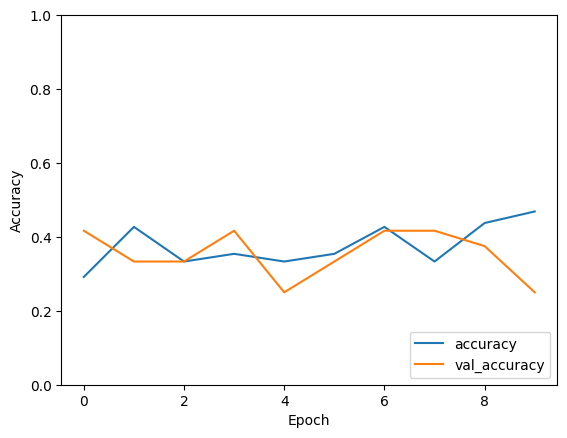

KNN Accuracy: 0.4583333333333333
SVM Accuracy: 0.625
Logistic Regression Accuracy: 0.6666666666666666
ANN Accuracy: 0.25


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import tensorflow as tf
from tensorflow.keras import layers, models

X_train, X_test, y_train, y_test = train_test_split(images_np_resized, labels_np, test_size=0.2, random_state=42)

X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_flat)
X_test_scaled = scaler.transform(X_test_flat)

# K-Nearest Neighbors (KNN)
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train_scaled, y_train)
knn_predictions = knn_classifier.predict(X_test_scaled)
knn_accuracy = accuracy_score(y_test, knn_predictions)
print("KNN Accuracy:", knn_accuracy)
print("KNN Classification Report:")
print(classification_report(y_test, knn_predictions))

# Support Vector Machine (SVM)
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_scaled, y_train)
svm_predictions = svm_classifier.predict(X_test_scaled)
svm_accuracy = accuracy_score(y_test, svm_predictions)
print("SVM Accuracy:", svm_accuracy)
print("SVM Classification Report:")
print(classification_report(y_test, svm_predictions))

# Logistic Regression
logistic_classifier = LogisticRegression()
logistic_classifier.fit(X_train_scaled, y_train)
logistic_predictions = logistic_classifier.predict(X_test_scaled)
logistic_accuracy = accuracy_score(y_test, logistic_predictions)
print("Logistic Regression Accuracy:", logistic_accuracy)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, logistic_predictions))

# Artificial Neural Network (ANN) using TensorFlow/Keras
input_shape = X_train.shape[1:]  # Shape of a single image
num_classes = len(np.unique(y_train))  # Number of unique classes

# Define the model
model = models.Sequential([
    layers.Flatten(input_shape=input_shape),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

from sklearn.preprocessing import LabelEncoder

# Convert string labels to numerical format
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)
# Train the model
history = model.fit(X_train, y_train_encoded, epochs=10, validation_data=(X_test, y_test_encoded))

# Evaluate the model
ann_loss, ann_accuracy = model.evaluate(X_test, y_test_encoded)
print("ANN Accuracy:", ann_accuracy)

# Plot accuracy and loss over training epochs
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()
print("KNN Accuracy:", knn_accuracy)
print("SVM Accuracy:", svm_accuracy)
print("Logistic Regression Accuracy:", logistic_accuracy)
print("ANN Accuracy:", ann_accuracy)